<a href="https://colab.research.google.com/github/sauloverissimo/analise_de_dados_puc/blob/main/MVP_analise_de_dados_puc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados PUC

**Nome:** Saulo Verissimo de Andrade

**Matrícula:** 40530010055

**Dataset:** [Formula 1 World Championship (1950 - 2024)](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

**------**

## Descrição do Problema

No universo da Fórmula 1, muito se discute sobre quem foi o "maior piloto de todos os tempos". Essa é uma questão complexa, pois envolve variáveis como número de títulos, vitórias, regularidade e até contexto histórico das temporadas. No entanto, muitos rankings e discussões populares se baseiam apenas em números absolutos de vitórias ou títulos mundiais, sem considerar fatores como o número de corridas disputadas ou o sistema de pontuação vigente em cada época.

O desafio que este projeto busca responder é:

Quem foi o piloto com melhor desempenho na história da Fórmula 1, levando em consideração o percentual de vitórias e a média de pontos por corrida ao longo de sua carreira?

Com isso, o objetivo é propor uma análise comparativa entre todos os pilotos da Fórmula 1, usando métricas relativas (percentual de vitórias e pontos/corrida) que permitam comparações mais justas entre diferentes épocas e estilos de disputa.

## Hipóteses do Problema

- Hipótese 1: Pilotos com maior número absoluto de vitórias não necessariamente apresentam o melhor desempenho em termos de percentual de vitórias e pontos por corrida.

- Hipótese 2: Pilotos de temporadas mais recentes tendem a apresentar médias de pontos por corrida mais elevadas devido à evolução dos sistemas de pontuação e ao aumento do número de provas por temporada. Por isso, será criado um score ajustado, que considera a razão entre os pontos alcançados pelo piloto e o total de pontos possíveis em cada temporada, permitindo uma comparação mais justa entre diferentes épocas.

- Hipótese 3: Pilotos que participaram de menos de duas temporadas não serão considerados na análise, para evitar distorções causadas por amostras muito pequenas.

- Hipótese 4: Para pilotos cuja carreira foi interrompida de forma abrupta, como no caso de acidentes fatais (ex: Ayrton Senna), o score será calculado apenas com base no período em que estiveram ativos, considerando o desempenho proporcional ao tempo de participação.

Essas hipóteses e critérios de recorte visam proporcionar uma análise mais precisa e comparativa entre pilotos de diferentes gerações, ajustando as métricas para minimizar distorções históricas e estatísticas.

## Tipo de Problema

O tipo de problema abordado é uma combinação de **análise exploratória de dados e classificação ordinal**. Inicialmente, serão extraídas e analisadas métricas relativas ao desempenho dos pilotos. Com base nessas métricas, os pilotos serão classificados em categorias de desempenho (“tiers”), que representam níveis ordenados, facilitando a visualização e comparação qualitativa entre os competidores.

## Seleção de Dados

### "Formula 1 World Championship (1950 - 2024)", disponível no Kaggle, que traz informações completas sobre corridas, pilotos, equipes, resultados e pontuações ao longo das temporadas da Fórmula 1.

- Ferramentas e Bibliotecas Utilizadas:

- Python: Linguagem principal utilizada para análise e manipulação dos dados.

- Pandas: Para leitura, filtragem, manipulação e análise das tabelas do dataset.

- NumPy: Para cálculos numéricos e manipulação de arrays.

- Matplotlib/Seaborn: Para criação de gráficos, incluindo visualizações comparativas e gráficos do tipo “tier list”.

- Jupyter Notebook: Ambiente utilizado para desenvolvimento interativo do projeto, integração de código e documentação.

(Opcional) Plotly: Caso seja necessário criar visualizações mais interativas.

### Critérios de Seleção dos Dados para Análise:

- Pilotos: Apenas pilotos que participaram de pelo menos 2 temporadas completas serão considerados, garantindo representatividade e evitando distorções por amostras pequenas.

- Período Ativo: Para pilotos cuja carreira foi interrompida abruptamente (ex: acidentes fatais), será considerado apenas o período em que estiveram ativos.

- Atributos Selecionados: Serão utilizados principalmente: número total de corridas disputadas, número de vitórias, pontos acumulados, temporadas ativas e equipes representadas.

- Pontuação Ajustada: Será calculada a proporção entre os pontos conquistados pelo piloto e o total de pontos possíveis em cada temporada, ajustando para diferenças de regulamento e sistemas de pontuação.

- Exclusão de Dados: Pilotos com menos de duas temporadas e participações pontuais/experimentais serão excluídos da análise principal.

## Atributos do Dataset

### O dataset contém:
- 861 pilotos
- 1125 corridas (até 2024)

### Para responder à sua pergunta e desenvolver as análises propostas, usaremos principalmente os seguintes arquivos:
- drivers.csv — informações sobre os pilotos (nome, nacionalidade, datas, etc.)
- races.csv — informações sobre cada corrida (data, temporada, local, etc.)
- results.csv — resultado de cada corrida (posição, pontos, piloto, equipe, etc.)
- circuits.csv - informações com o nome dos circuitos

In [159]:
# Análise e tratamento de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Edição de visualizações
sns.set_theme(style="darkgrid", palette="Set2")
sns.set_palette('Set2')

In [160]:
# carregamento do dataset

import os

drivers = pd.read_csv('https://raw.githubusercontent.com/sauloverissimo/analise_de_dados_puc/refs/heads/main/data/drivers.csv')
races = pd.read_csv('https://raw.githubusercontent.com/sauloverissimo/analise_de_dados_puc/refs/heads/main/data/races.csv')
results = pd.read_csv('https://raw.githubusercontent.com/sauloverissimo/analise_de_dados_puc/refs/heads/main/data/results.csv')
circuits = pd.read_csv('https://raw.githubusercontent.com/sauloverissimo/analise_de_dados_puc/refs/heads/main/data/circuits.csv')

# dataframes

df_drivers = drivers.copy()
df_races = races.copy()
df_results = results.copy()
df_circuits = circuits.copy()

In [161]:
# drivers
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [162]:
# races
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [163]:
# results
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [164]:
# circuits
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


## Coleta e Análise de Dados
Nesta etapa de Análise Exploratória de Dados (EDA), buscamos compreender a estrutura e as principais características do dataset da Fórmula 1, que cobre 1125 corridas e 861 pilotos de 1950 a 2024.
As tabelas principais são:

- drivers: dados cadastrais dos pilotos.

- races: informações das corridas.

- results: resultados e pontuações de cada piloto por corrida.

Essas informações servirão de base para as análises comparativas e o desenvolvimento das métricas de desempenho.

A maior parte dos atributos possui natureza categórica (nomes, códigos, equipes) ou numérica (quantidade de pontos, posição final), permitindo a construção de métricas descritivas e comparativas para a análise de desempenho dos pilotos ao longo das temporadas.



### Total e Tipo das Instâncias


In [165]:
print(f'\n------------------------------------------------')

print(f"Total de instâncias de pilotos: {len(df_drivers)}")
print("\nTipos de dados por coluna:")
print(df_drivers.info())

print(f'\n------------------------------------------------')

print(f"Total de instâncias de corridas: {len(df_races)}")
print("\nTipos de dados por coluna:")
print(df_races.info())

print(f'\n------------------------------------------------')

print(f"Total de instâncias de resultados: {len(df_results)}")
print("\nTipos de dados por coluna:")
print(df_results.info())

print(f'\n------------------------------------------------')

print(f"Total de instâncias de circuitos: {len(df_circuits)}")
print("\nTipos de dados por coluna:")
print(df_circuits.info())

print(f'\n------------------------------------------------')


------------------------------------------------
Total de instâncias de pilotos: 861

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB
None

------------------------------------------------
Total de instâncias de corridas: 1125

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------

### Distribuição
> Como temos centenas de pilotos, escolhi a categoria país para apresentar a distribuição

**Distribuição de pilotos por país: **

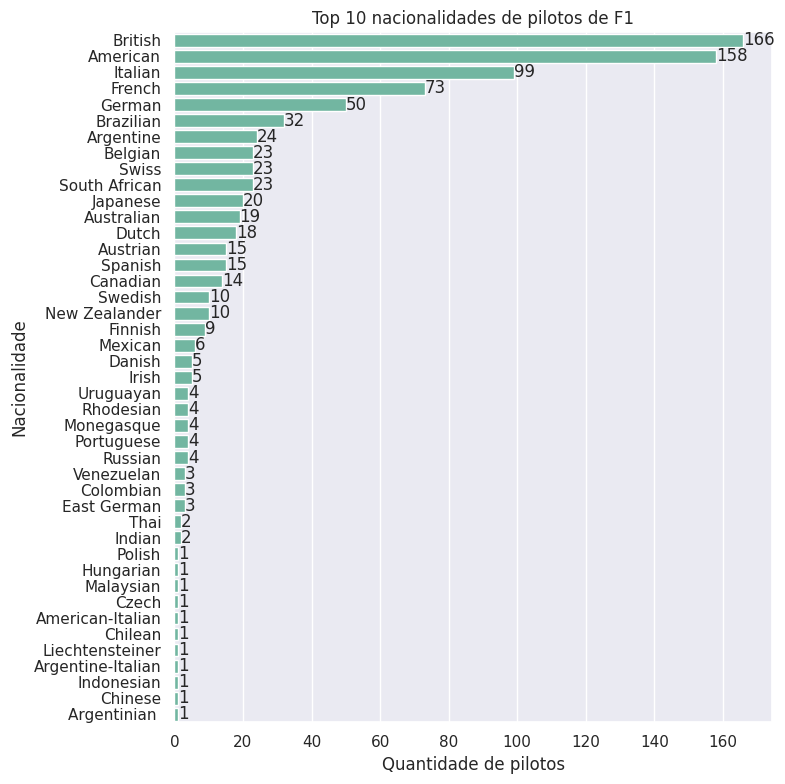

In [166]:
# Top 10 países com mais pilotos
top_countries = df_drivers['nationality'].value_counts()

plt.figure(figsize=(8,8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 nacionalidades de pilotos de F1')
plt.xlabel('Quantidade de pilotos')
plt.ylabel('Nacionalidade')

#rótulos de dados
for i, v in enumerate(top_countries.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.tight_layout()
plt.show()


> Como temos centenas de corridas, criei a categoria 'Década' para apresentar a distribuição

**Distribuição de pilotos por 'Década': **

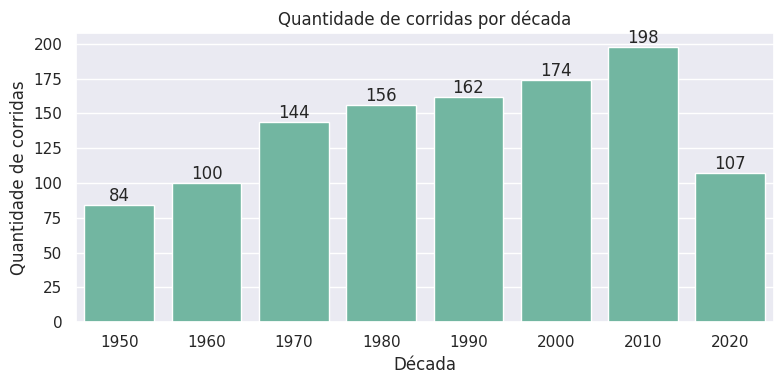

In [167]:
df_races['decade'] = (df_races['year']//10)*10
decade_counts = df_races['decade'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values)
plt.title('Quantidade de corridas por década')
plt.xlabel('Década')
plt.ylabel('Quantidade de corridas')

# rotulos de dados
for i, v in enumerate(decade_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Estatísticas Descritivas
>

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [168]:
# Drivers
df_drivers.describe()

,driverId
count,861.000000
mean,431.061556
std,248.793797
min,1.000000
25%,216.000000
50%,431.000000
75%,646.000000
max,862.000000


In [169]:
# Races
df_races.describe()

,raceId,year,round,circuitId,decade
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,565.710222,1992.703111,8.579556,23.889778,1988.320000
std,328.813817,20.603848,5.159910,19.633527,20.822175
min,1.000000,1950.000000,1.000000,1.000000,1950.000000
25%,282.000000,1977.000000,4.000000,9.000000,1970.000000
50%,563.000000,1994.000000,8.000000,18.000000,1990.000000
75%,845.000000,2011.000000,13.000000,34.000000,2010.000000
max,1144.000000,2024.000000,24.000000,80.000000,2020.000000


In [170]:
# Results
df_results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000
mean,13380.977391,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,46.301768,17.224971
std,7726.134642,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,29.496557,26.026104
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6690.500000,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000
50%,13380.000000,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,20069.500000,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26764.000000,1144.000000,862.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [171]:
# Circuits
df_circuits.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683,247.012987
std,23.001701,22.808866,65.516951,362.738469
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,32.777400,-9.394170,18.000000
50%,40.000000,40.951700,3.930830,129.000000
75%,59.000000,46.958900,19.248600,332.000000
max,80.000000,57.265300,144.968000,2227.000000


#### Médias

In [172]:
# corridas por temporada

media_corridas_temporada = df_races.groupby('year').size().mean()
print(f"Média de corridas por temporada: {media_corridas_temporada:.2f}")

Média de corridas por temporada: 15.00


In [173]:
# Pilotos únicos por temporada

pilotos_por_temporada = df_results.groupby('raceId')['driverId'].nunique()
corrida_para_ano = df_races.set_index('raceId')['year']
pilotos_por_ano = pilotos_por_temporada.groupby(corrida_para_ano).mean()
print(f"Média de pilotos por corrida: {pilotos_por_ano.mean():.2f}")

Média de pilotos por corrida: 23.77


In [174]:
# Quantas temporadas cada piloto participou
results_com_ano = df_results.merge(df_races[['raceId', 'year']], on='raceId')
tempos_por_piloto = results_com_ano.groupby('driverId')['year'].nunique()
print(f"Média de temporadas por piloto: {tempos_por_piloto.mean():.2f}")
print(f"Mediana de temporadas por piloto: {tempos_por_piloto.median():.2f}")


Média de temporadas por piloto: 3.73
Mediana de temporadas por piloto: 2.00


#### Desvio Padrão


In [175]:
# Desvio padrão do número de corridas por temporada
std_corridas_temporada = df_races.groupby('year').size().std()
print(f"Desvio padrão do número de corridas por temporada: {std_corridas_temporada:.2f}")


Desvio padrão do número de corridas por temporada: 4.20


In [176]:
# Desvio padrão do número de pilotos por corrida
pilotos_por_corrida = df_results.groupby('raceId')['driverId'].nunique()
std_pilotos_corrida = pilotos_por_corrida.std()
print(f"Desvio padrão do número de pilotos por corrida: {std_pilotos_corrida:.2f}")


Desvio padrão do número de pilotos por corrida: 4.73


In [177]:
# Desvio padrão do número de temporadas por piloto
results_com_ano = df_results.merge(df_races[['raceId', 'year']], on='raceId')
tempos_por_piloto = results_com_ano.groupby('driverId')['year'].nunique()
std_temporadas_piloto = tempos_por_piloto.std()
print(f"Desvio padrão do número de temporadas por piloto: {std_temporadas_piloto:.2f}")


Desvio padrão do número de temporadas por piloto: 3.55


#### Histogramas

> Quantidade de temporadas por piloto


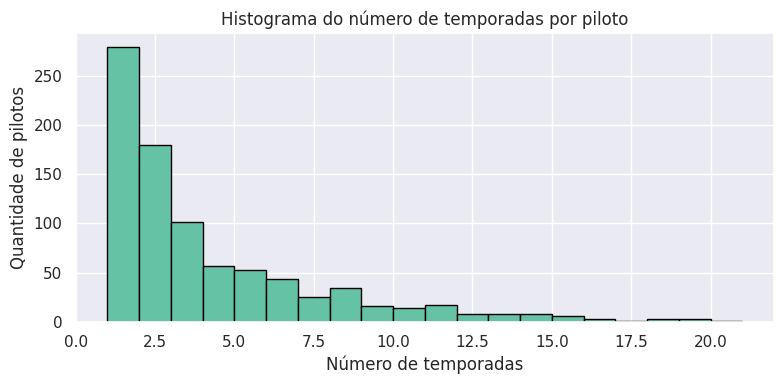

In [178]:
import matplotlib.pyplot as plt

# Quantidade de temporadas por piloto
results_com_ano = df_results.merge(df_races[['raceId', 'year']], on='raceId')
tempos_por_piloto = results_com_ano.groupby('driverId')['year'].nunique()

plt.figure(figsize=(8,4))
plt.hist(tempos_por_piloto, bins=20, edgecolor='black')
plt.title('Histograma do número de temporadas por piloto')
plt.xlabel('Número de temporadas')
plt.ylabel('Quantidade de pilotos')
plt.tight_layout()
plt.show()


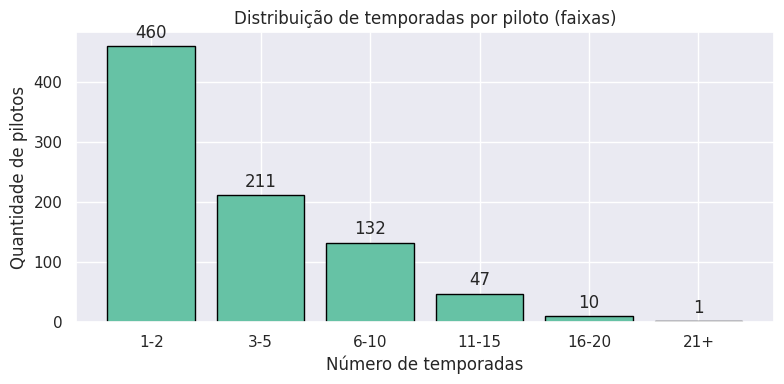

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Quantidade de temporadas por piloto agrupadas
tempos_por_piloto = results_com_ano.groupby('driverId')['year'].nunique()

# Definindo os grupos
bins = [0, 2, 5, 10, 15, 20, 50]
labels = ['1-2', '3-5', '6-10', '11-15', '16-20', '21+']
tempos_por_piloto_cat = pd.cut(tempos_por_piloto, bins=bins, labels=labels, right=True, include_lowest=True)
counts = tempos_por_piloto_cat.value_counts(sort=False)

plt.figure(figsize=(8,4))
bars = plt.bar(labels, counts.values, edgecolor='black')

# Adicionando rótulos de dados
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # deslocamento em relação ao topo da barra
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Distribuição de temporadas por piloto (faixas)')
plt.xlabel('Número de temporadas')
plt.ylabel('Quantidade de pilotos')
plt.tight_layout()
plt.show()


> Total de pontos por piloto

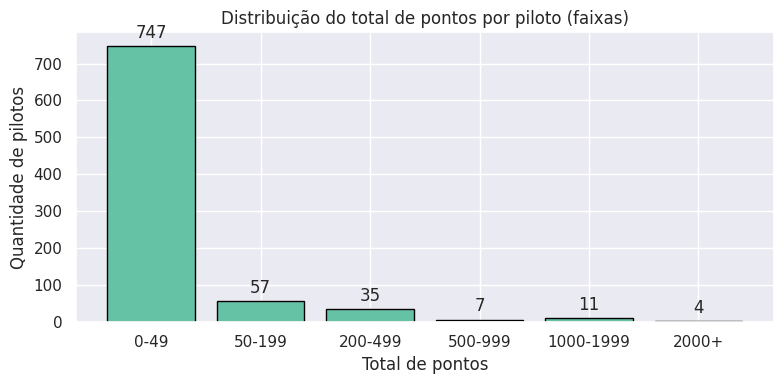

In [180]:
# Total de pontos por piloto
pontos_por_piloto = df_results.groupby('driverId')['points'].sum()

bins_pts = [0, 50, 200, 500, 1000, 2000, pontos_por_piloto.max()+1]
labels_pts = ['0-49', '50-199', '200-499', '500-999', '1000-1999', '2000+']
pontos_cat = pd.cut(pontos_por_piloto, bins=bins_pts, labels=labels_pts, right=False, include_lowest=True)
counts_pts = pontos_cat.value_counts(sort=False)

plt.figure(figsize=(8,4))
bars = plt.bar(labels_pts, counts_pts.values, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Distribuição do total de pontos por piloto (faixas)')
plt.xlabel('Total de pontos')
plt.ylabel('Quantidade de pilotos')
plt.tight_layout()
plt.show()


> Número de vitórias por piloto

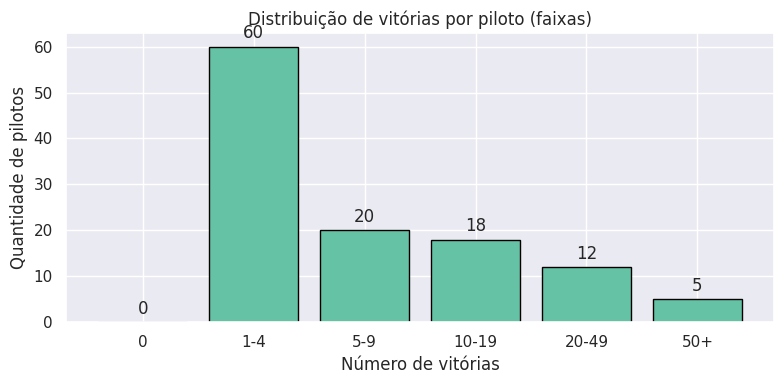

In [181]:
# Número de vitórias por piloto
vitorias_por_piloto = df_results[df_results['positionOrder'] == 1].groupby('driverId').size()

bins_vit = [0, 1, 5, 10, 20, 50, vitorias_por_piloto.max()+1]
labels_vit = ['0', '1-4', '5-9', '10-19', '20-49', '50+']
vitorias_cat = pd.cut(vitorias_por_piloto, bins=bins_vit, labels=labels_vit, right=False, include_lowest=True)
counts_vit = vitorias_cat.value_counts(sort=False)

plt.figure(figsize=(8,4))
bars = plt.bar(labels_vit, counts_vit.values, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Distribuição de vitórias por piloto (faixas)')
plt.xlabel('Número de vitórias')
plt.ylabel('Quantidade de pilotos')
plt.tight_layout()
plt.show()


#### Identificação de Nulos
> Como o dataset não possui valores nulos, seguimos em frente para a p´roxima etapa.

In [182]:
print("Valores nulos em df_drivers:\n", df_drivers.isnull().sum())
print("\nValores nulos em df_races:\n", df_races.isnull().sum())
print("\nValores nulos em df_results:\n", df_results.isnull().sum())

Valores nulos em df_drivers:
 driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

Valores nulos em df_races:
 raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
decade         0
dtype: int64

Valores nulos em df_results:
 resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64


#### Outliers
> Os pilotos com carreiras mais longas aparecem como outliers, justamente por serem exceções de sucesso e longevidade na Fórmula 1.

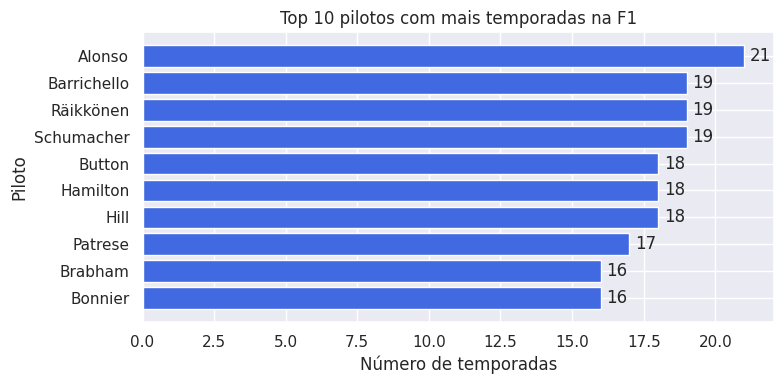

In [183]:
# Recalcular temporadas por piloto
tempos_por_piloto = results_com_ano.groupby('driverId')['year'].nunique()
top_pilotos = tempos_por_piloto.sort_values(ascending=False).head(10)
# Obter nomes
nomes_top = df_drivers.set_index('driverId').loc[top_pilotos.index, 'surname']

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
bars = plt.barh(nomes_top[::-1], top_pilotos[::-1], color='royalblue')  # Plot do menor para o maior

# Adiciona rótulos de dados
for bar in bars:
    width = bar.get_width()
    plt.text(width+0.2, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.title('Top 10 pilotos com mais temporadas na F1')
plt.xlabel('Número de temporadas')
plt.ylabel('Piloto')
plt.tight_layout()
plt.show()


> Gráfico de barras destacando “longevos” versus “média”

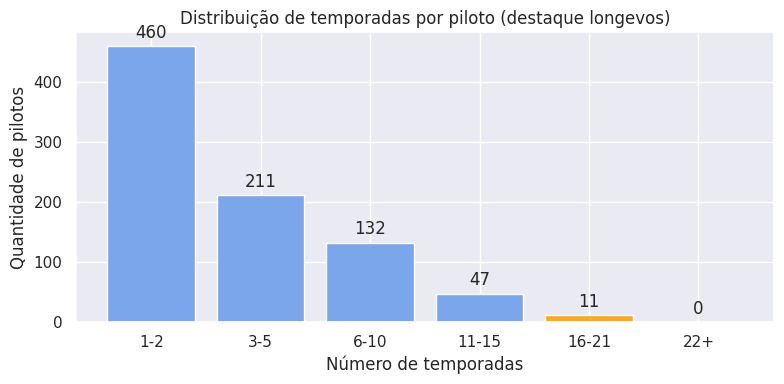

In [184]:
# Define faixas
faixas = [0, 2, 5, 10, 15, 21, 40]
labels = ['1-2', '3-5', '6-10', '11-15', '16-21', '22+']
tempos_cat = pd.cut(tempos_por_piloto, bins=faixas, labels=labels, right=True, include_lowest=True)
contagem_faixas = tempos_cat.value_counts().sort_index()

# Cores: destaque para a última faixa
cores = ['#7ca6eb'] * (len(labels)-2) + ['#fbab18', '#e75223']

plt.figure(figsize=(8,4))
bars = plt.bar(labels, contagem_faixas.values, color=cores)

# Rótulos de dados
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Distribuição de temporadas por piloto (destaque longevos)')
plt.xlabel('Número de temporadas')
plt.ylabel('Quantidade de pilotos')
plt.tight_layout()
plt.show()



## Pré-Processamento de Dados


### Drivers

> Drivers:
> Remover a coluna 'number'

In [185]:
df_drivers = df_drivers.drop(columns=['number'])

> Preencher valores ausentes ou inválidos em 'code'

In [186]:
import re

def gerar_code(surname):
    # Remove espaços e caracteres especiais, pega as 3 primeiras letras em maiúsculo
    if pd.isnull(surname):
        return None
    return re.sub(r'[^A-Za-z]', '', surname)[:3].upper()

# Substituir '\N' por NaN para facilitar o tratamento
df_drivers['code'] = df_drivers['code'].replace({'\\N': None, np.nan: None})

# Preencher os códigos ausentes
df_drivers['code'] = df_drivers.apply(
    lambda row: row['code'] if row['code'] not in [None, '', np.nan] else gerar_code(row['surname']),
    axis=1
)


In [187]:
df_drivers.head(10)

,driverId,driverRef,code,forename,surname,dob,nationality,url
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


### Races
> Remoção de colunas, formatação e ordenação das colunas da tabela

In [188]:
cols_remover = [
    'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
    'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time'
]

df_races = df_races.drop(columns=[col for col in cols_remover if col in df_races.columns])


In [189]:
# Colocar a coluna 'date' em formato de data
df_races['date'] = pd.to_datetime(df_races['date'])

# Cria a coluna 'order', que indica a ordem cronológica das corridas
df_races = df_races.sort_values('date').reset_index(drop=True)
df_races['order'] = df_races.index + 1


In [190]:
df_races['decade'] = (df_races['year'] // 10) * 10
df_races['decade'] = df_races['decade'].astype(str) + 's'

In [191]:
# Ordenção do dataframe
colunas_ordenadas = ['order', 'raceId', 'year', 'decade', 'round', 'circuitId', 'name', 'date', 'url']
df_races = df_races[colunas_ordenadas]


In [192]:
df_races.head(10)

,order,raceId,year,decade,round,circuitId,name,date,url
0,1,833,1950,1950s,1,9,British Grand Prix,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,2,834,1950,1950s,2,6,Monaco Grand Prix,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,3,835,1950,1950s,3,19,Indianapolis 500,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,4,836,1950,1950s,4,66,Swiss Grand Prix,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,5,837,1950,1950s,5,13,Belgian Grand Prix,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
5,6,838,1950,1950s,6,55,French Grand Prix,1950-07-02,http://en.wikipedia.org/wiki/1950_French_Grand...
6,7,839,1950,1950s,7,14,Italian Grand Prix,1950-09-03,http://en.wikipedia.org/wiki/1950_Italian_Gran...
7,8,825,1951,1950s,1,66,Swiss Grand Prix,1951-05-27,http://en.wikipedia.org/wiki/1951_Swiss_Grand_...
8,9,826,1951,1950s,2,19,Indianapolis 500,1951-05-30,http://en.wikipedia.org/wiki/1951_Indianapolis...
9,10,827,1951,1950s,3,13,Belgian Grand Prix,1951-06-17,http://en.wikipedia.org/wiki/1951_Belgian_Gran...


### Results
> Substituir '\N' por valores nulos (NaN), criar a coluna 'driver_time' convertendo 'milliseconds' para 'hh:mm:ss.SSS'

In [193]:
df_results = df_results.replace({'\\N': np.nan})

In [194]:
def ms_to_time(ms):
    if pd.isnull(ms):
        return np.nan
    ms = int(ms)
    hours = ms // (1000 * 60 * 60)
    minutes = (ms // (1000 * 60)) % 60
    seconds = (ms // 1000) % 60
    millis = ms % 1000
    if hours > 0:
        return f"{hours}:{minutes:02d}:{seconds:02d}.{millis:03d}"
    else:
        return f"{minutes}:{seconds:02d}.{millis:03d}"

df_results['driver_time'] = df_results['milliseconds'].apply(ms_to_time)


In [195]:
colunas_ordenadas = [
    'resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position',
    'positionText', 'positionOrder', 'points', 'laps', 'time', 'driver_time', 'milliseconds',
    'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId'
]

# Seleciona apenas as colunas disponíveis, para evitar erro caso alguma não exista
colunas_ordenadas_existentes = [col for col in colunas_ordenadas if col in df_results.columns]

df_results = df_results[colunas_ordenadas_existentes]


In [196]:
df_results.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,driver_time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,1:34:56.094,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,1:34:58.779,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,1:35:07.797,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,1:35:08.630,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,NaN,NaN,NaN,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,NaN,NaN,NaN,54,8,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,NaN,NaN,NaN,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,NaN,R,9,0.0,47,NaN,NaN,NaN,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,NaN,R,10,0.0,43,NaN,NaN,NaN,23,13,1:29.558,213.166,3


## Modelagem

Modelagem
O objetivo desta etapa é criar indicadores que permitam comparar pilotos de diferentes épocas da Fórmula 1, levando em conta não apenas seus resultados absolutos, mas também o contexto de cada temporada (quantidade de corridas e sistema de pontuação vigente).

### 1. Indicadores básicos por piloto
- Corridas disputadas: Quantidade total de provas que cada piloto participou.

- Vitórias: Número de vezes que terminou em 1º lugar.

- Pontos totais: Soma dos pontos conquistados em toda a carreira.

- Média de pontos por corrida: Razão entre pontos totais e corridas disputadas.

Esses indicadores já fornecem uma primeira visão de desempenho, mas não são suficientes para comparar pilotos de diferentes épocas, pois o número de corridas e o sistema de pontuação mudaram ao longo do tempo.

### 3. Score médio do piloto
- Para cada piloto, calcula-se a média do score relativo nas temporadas em que participou.

Isso permite comparar o "aproveitamento" do piloto ao longo da carreira, independentemente do sistema de pontuação ou do número de corridas de sua época.

### 4. Filtros e ranking final
- Serão considerados apenas pilotos com pelo menos 2 temporadas completas, para evitar distorções por amostras pequenas.

- Por fim, será criado um ranking dos pilotos baseado no score médio relativo ao longo da carreira.

Os pilotos serão ser classificados em categorias (tiers) conforme seu desempenho.


In [197]:
# Total de corridas disputadas por piloto
corridas_por_piloto = df_results.groupby('driverId')['raceId'].nunique()

# Total de vitórias (posição 1) por piloto
vitorias_por_piloto = df_results[df_results['positionOrder'] == 1].groupby('driverId')['raceId'].nunique()

# Total de pontos por piloto
pontos_por_piloto = df_results.groupby('driverId')['points'].sum()

# Média de pontos por corrida
media_pontos_por_corrida = pontos_por_piloto / corridas_por_piloto

# Junta tudo em um dataframe
df_tier_list = pd.DataFrame({
    'total_corridas': corridas_por_piloto,
    'total_vitorias': vitorias_por_piloto,
    'total_pontos': pontos_por_piloto,
    'media_pontos_corrida': media_pontos_por_corrida
}).fillna(0)  # pilotos sem vitória terão NaN, trocamos por zero

df_tier_list = df_tier_list.merge(
    df_drivers[['driverId', 'surname', 'forename', 'code']],
    on='driverId',
    how='left'
)

# Reorganiza colunas
df_tier_list = df_tier_list[['driverId', 'code', 'forename', 'surname', 'total_corridas', 'total_vitorias', 'total_pontos', 'media_pontos_corrida']]

# merge da tabela de results com a races
resultados_com_ano = df_results.merge(df_races[['raceId', 'year']], on='raceId', how='left')

# Quantidade de temporadas únicas por piloto
temporadas_por_piloto = resultados_com_ano.groupby('driverId')['year'].nunique()


> Criação do dataframe TIER LIST

In [198]:

# Incluindo no dataframe de tier_list
df_tier_list['total_temporadas'] = df_tier_list['driverId'].map(temporadas_por_piloto).fillna(0).astype(int)

# Reorganizando as colunas
df_tier_list = df_tier_list[['driverId', 'code', 'forename', 'surname', 'total_temporadas', 'total_corridas', 'total_vitorias', 'total_pontos', 'media_pontos_corrida']]

df_tier_list['percentual_vitorias'] = (df_tier_list['total_vitorias'] / df_tier_list['total_corridas']).fillna(0)

# ordenar por media_pontos_corrida
df_tier_list.sort_values(by='percentual_vitorias', ascending=False, inplace=True)

# Exibe as primeiras linhas
df_tier_list.head(20)

# quantos anos o piloto correu
anos_por_piloto = resultados_com_ano.groupby('driverId')['year'].unique()

# Junta os resultados com as corridas para pegar o ano
resultados_com_ano = df_results.merge(df_races[['raceId', 'year']], on='raceId', how='left')

# Para cada temporada (ano), soma o maior número de pontos de cada corrida (normalmente o vencedor)
pontos_possiveis_por_corrida = resultados_com_ano.groupby(['year', 'raceId'])['points'].max()
pontos_possiveis_por_ano = pontos_possiveis_por_corrida.groupby('year').sum()

# pontos disputados
total_pontos_possiveis_por_piloto = {}

for piloto, anos in anos_por_piloto.items():
    total = pontos_possiveis_por_ano.loc[anos].sum()
    total_pontos_possiveis_por_piloto[piloto] = total

df_tier_list['total_pontos_possiveis'] = df_tier_list['driverId'].map(total_pontos_possiveis_por_piloto)


In [199]:
df_tier_list['score'] = (df_tier_list['total_pontos'] / df_tier_list['total_pontos_possiveis']).fillna(0)
df_tier_list = df_tier_list[df_tier_list['total_temporadas'] >= 2].copy()
df_tier_list['Piloto'] = df_tier_list['forename'] + ' ' + df_tier_list['surname']
df_tier_list.sort_values(by='score', ascending=False, inplace=True)

> Modelagem final da df_tier_list

In [200]:
df_tier_list.head(20)

,driverId,code,forename,surname,total_temporadas,total_corridas,total_vitorias,total_pontos,media_pontos_corrida,percentual_vitorias,total_pontos_possiveis,score,Piloto
0,1,HAM,Lewis,Hamilton,18,356,105.0,4820.50,13.540730,0.294944,8189.50,0.588620,Lewis Hamilton
828,830,VER,Max,Verstappen,10,209,63.0,2912.50,13.935407,0.301435,5249.50,0.554815,Max Verstappen
578,579,FAN,Juan,Fangio,8,51,24.0,279.14,5.473333,0.470588,554.64,0.503281,Juan Fangio
19,20,VET,Sebastian,Vettel,16,300,53.0,3098.00,10.326667,0.176667,7027.50,0.440840,Sebastian Vettel
116,117,PRO,Alain,Prost,13,202,51.0,798.50,3.952970,0.252475,1858.50,0.429648,Alain Prost
2,3,ROS,Nico,Rosberg,11,206,23.0,1594.50,7.740291,0.111650,4120.00,0.387015,Nico Rosberg
327,328,STE,Jackie,Stewart,9,100,27.0,360.00,3.600000,0.270000,936.00,0.384615,Jackie Stewart
29,30,MSC,Michael,Schumacher,19,308,91.0,1566.00,5.084416,0.295455,4125.00,0.379636,Michael Schumacher
101,102,SEN,Ayrton,Senna,11,162,41.0,614.00,3.790123,0.253086,1638.50,0.374733,Ayrton Senna
842,844,LEC,Charles,Leclerc,7,149,8.0,1363.00,9.147651,0.053691,3749.50,0.363515,Charles Leclerc


## Pós-processamento de Dados
> Criação do df_tier_list para reponder a Descrição do problema.

In [201]:
# 1. Definição dos limites das faixas de tier
faixas_tier = {
    "S": 0.5,
    "AA+": 0.35,
    "A": 0.25,
    "B": 0.18,
    "C": 0.12,
    "D": 0.05,
    "F": 0  # Todos abaixo de 0.05
}


def atribuir_tier(score, faixas):
    for tier, limite in faixas.items():
        if score >= limite:
            return tier
    return "F"

df_tier_list['tier'] = df_tier_list['score'].apply(lambda x: atribuir_tier(x, faixas_tier))

print(df_tier_list[['Piloto', 'score', 'tier']].sort_values('score', ascending=False).head(100))


               Piloto     score tier
0      Lewis Hamilton  0.588620    S
828    Max Verstappen  0.554815    S
578       Juan Fangio  0.503281    S
19   Sebastian Vettel  0.440840  AA+
116       Alain Prost  0.429648  AA+
..                ...       ...  ...
122   Thierry Boutsen  0.081810    D
344   Pedro Rodríguez  0.081329    D
174    Patrick Tambay  0.080879    D
14       Jarno Trulli  0.077638    D
722      Rudi Fischer  0.074349    D

[100 rows x 3 columns]


Criação do Painel Visual dos maiores pilotos de F1 de todos os tempos.

In [202]:
tiers = ['S', 'AA+', 'A', 'B', 'C', 'D', 'F']
data = {}
for tier in tiers:
    data[f"{tier.lower()}_tier"] = [
        {"Piloto": row['Piloto'], "score": row['score']}
        for _, row in df_tier_list[df_tier_list['tier'] == tier].iterrows()
    ]


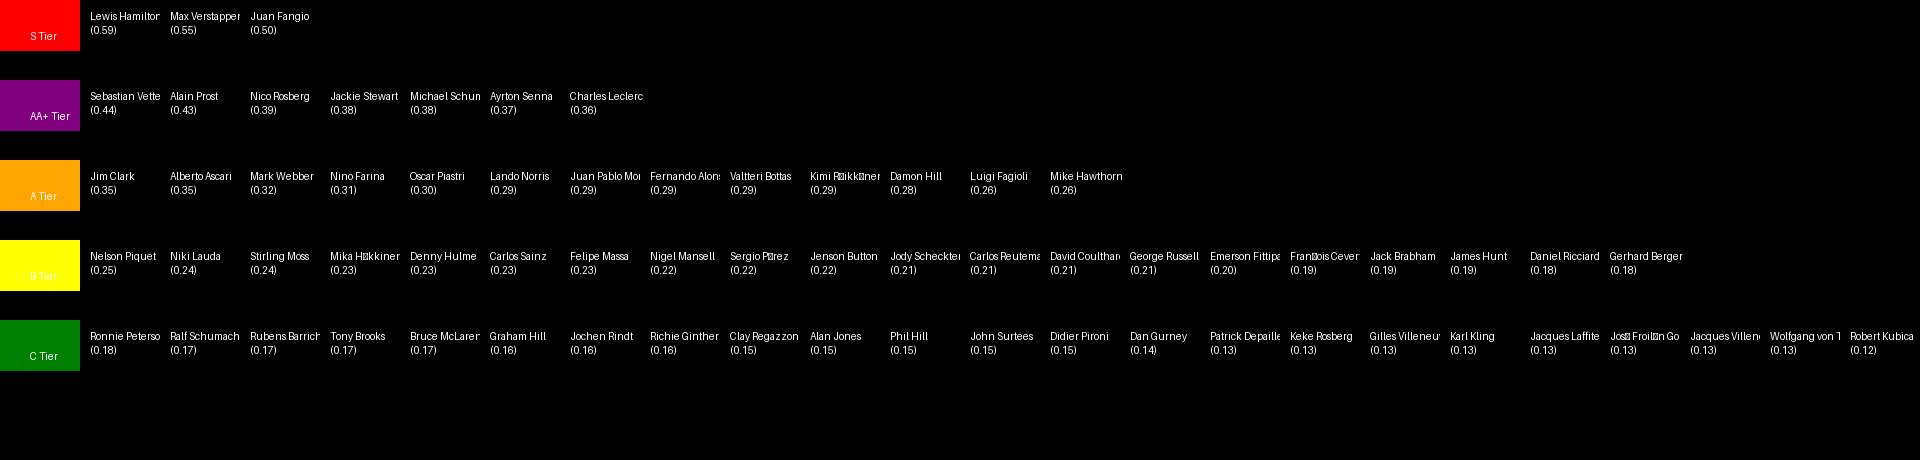

In [206]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# função rpa gerar o tier list
def gerar_tierlist_pilotos_colab(data):
    image_width = 1920
    image_height = 1080
    font = ImageFont.load_default()         # Fonte padrão do PIL
    tier_font = ImageFont.load_default()    # Mesma coisa para tier

    slot_width = 80
    slot_height = 50
    row_pos = 0
    col_pos = 0

    # cores
    cores_tier = {
        "S": "red", "AA+": "purple", "A": "orange",
        "B": "yellow", "C": "green", "D": "blue", "F": "gray"
    }
    tiers = ['S', 'AA+', 'A', 'B', 'C']

    image = Image.new("RGB", (image_width, image_height), "black")
    draw = ImageDraw.Draw(image)

    for tier in tiers:
        draw.rectangle((col_pos, row_pos, col_pos+slot_width, row_pos+slot_height), fill=cores_tier[tier])
        draw.text((col_pos+30, row_pos+30), f"{tier} Tier", font=tier_font, fill="white")
        col_pos += slot_width

        for piloto in data[f"{tier.lower()}_tier"]:
            draw.rectangle((col_pos, row_pos, col_pos+slot_width, row_pos+slot_height), fill="black")
            nome = f"{piloto['Piloto']}\n({piloto['score']:.2f})"
            draw.text((col_pos+10, row_pos+10), nome, font=font, fill="white")
            col_pos += slot_width
            if col_pos > image_width - slot_width:
                row_pos += slot_height + 10
                col_pos = 0

        row_pos += slot_height + 30
        col_pos = 0

    image = image.crop((0, 0, image_width, row_pos))
    display(image)

gerar_tierlist_pilotos_colab(data)


## Conclusão

A proposta deste trabalho foi analisar e sintetizar o desempenho dos pilotos de Fórmula 1 a partir de dados históricos, utilizando métricas objetivas para permitir uma comparação justa e transparente entre diferentes gerações.

Ao longo do projeto, partimos das seguintes hipóteses:

- Hipótese principal: É possível criar uma métrica composta (score) capaz de refletir, de forma justa, o desempenho global de um piloto.


- Hipótese secundária: A visualização dos resultados em formato de tier list facilita a interpretação do nível de excelência dos pilotos e revela padrões históricos relevantes.

A partir da base de dados selecionada, extraímos indicadores-chave, calculando scores finais e agrupando os pilotos em faixas de performance por meio da Tier List.

> O resultado mais expressivo da análise foi a identificação de **Lewis Hamilton** como o piloto com maior score no recorte histórico analisado, posicionando-se no topo absoluto da Tier List (“S Tier”).

> Hamilton foi seguido por outros grandes nomes, como Max Verstappen e Juan Manuel Fangio, também presentes na elite da categoria, conforme a visualização final.

A abordagem adotada permitiu:

- Comparar pilotos de diferentes épocas sob critérios padronizados.

- Identificar como contextos distintos impactaram o desempenho dos atletas.

- Evidenciar um grupo seleto de pilotos com desempenho historicamente superior.

A Tier List criada consolidou esses achados de forma visual e acessível, tornando o resultado facilmente interpretável tanto para especialistas quanto para fãs do esporte.

Em síntese, o trabalho validou as hipóteses iniciais.
Mostramos que a combinação de análise exploratória, modelagem estatística e visualização criativa permite transformar dados históricos em conhecimento relevante e engajador.

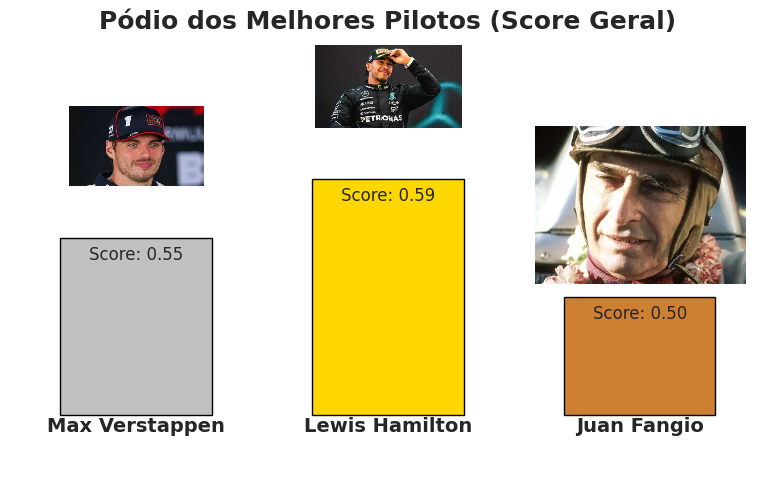

In [216]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from io import BytesIO

# URLs das imagens dos pilotos
imgs = [
    'https://th.bing.com/th/id/OIF.E9rFC26Nwbs1hUeKUJ6wXQ?w=302&h=180&c=7&r=0&o=7&pid=1.7&rm=3',  # Max Verstappen
    'https://th.bing.com/th/id/OIP.dqxyNu7uUX6w02QNssbfggHaEK?w=330&h=185&c=7&r=0&o=7&pid=1.7&rm=3',  # Lewis Hamilton
    'https://tse4.mm.bing.net/th/id/OIP.gNWyW8jVvz67a5AWfrei2AHaFj?rs=1&pid=ImgDetMain&o=7&rm=3'  # Juan Fangio
]

nomes_podio = ['Max Verstappen', 'Lewis Hamilton', 'Juan Fangio']
scores_podio = [0.55, 0.59, 0.50]
alturas = [1.5, 2, 1]
cores = ['#C0C0C0', '#FFD700', '#CD7F32']

fig, ax = plt.subplots(figsize=(8,5))

for i, (altura, cor) in enumerate(zip(alturas, cores)):
    # Degrau do pódio
    ax.bar(i, altura, width=0.6, color=cor, edgecolor='black', zorder=2)
    # Score (dentro do degrau)
    ax.text(i, altura - 0.22, f"Score: {scores_podio[i]:.2f}", ha='center', va='bottom', fontsize=12)
    # Posição (dentro do degrau, na base)
    ax.text(i, 0.05, f"{['2º','1º','3º'][i]}", ha='center', va='bottom', fontsize=20, fontweight='bold', color=cor, zorder=3)
    # Nome na base da barra
    ax.text(i, -0.18, nomes_podio[i], ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Imagem acima da barra
    response = requests.get(imgs[i])
    img = Image.open(BytesIO(response.content))
    im = OffsetImage(img, zoom=0.32)
    ab = AnnotationBbox(im, (i, altura + 0.78), frameon=False)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 3.2)
ax.set_title('Pódio dos Melhores Pilotos (Score Geral)', fontsize=18, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()
